In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
#Esteblecermos el universo de las variables 
x_luz =np.arange(0, 100, 1)
x_temperatura =np.arange(0, 100, 1)

In [3]:
# Variables de Entrada

# ==========================
# luz exterior -> [baja , ambiente , alta]
#recordemos que en esta variable tenemos del tipo trapezoidal y triangular
# ==========================

LB = fuzz.trapmf(x_luz,[-30.24, -9.76, 9.76, 30.24])
LAB = fuzz.trimf(x_luz,[10, 50, 90])
LA = fuzz.trapmf(x_luz,[70, 85, 100, 100])

# ==========================
# temperatura -> [frio , ambiente , caliente]
# ==========================

TF = fuzz.trapmf(x_temperatura,[-26.1, -4.56, 8.98, 19.97])
TA = fuzz.trimf(x_temperatura,[16, 28, 40])
TC = fuzz.trapmf(x_temperatura,[35, 50, 100, 100])

In [4]:
#Variable de Salida
#en este caso asignamos los valores constantes de la potencia del foco
Apagado = 0.25
medioEncendido = 0.50
Encendido = 0.75

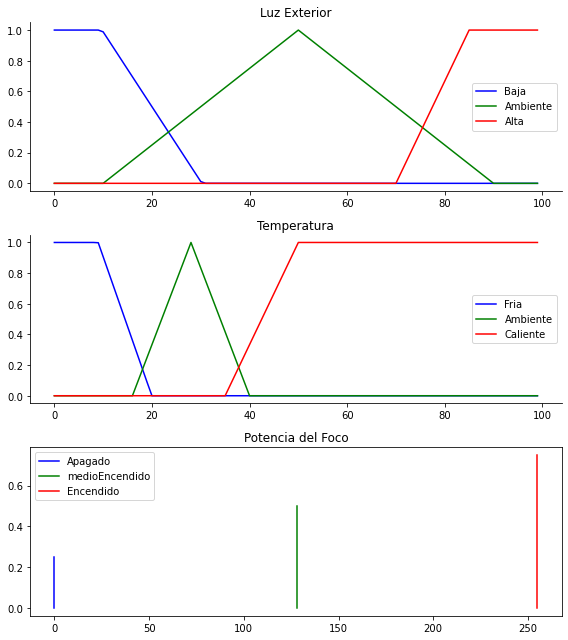

In [6]:
#ahora visualizaremos el universo y las funciones de membresia 
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_luz, LB,'b', linewidth=1.5, label='Baja')
ax0.plot(x_luz, LAB,'g', linewidth=1.5, label='Ambiente')
ax0.plot(x_luz, LA,'r', linewidth=1.5, label='Alta')
ax0.set_title('Luz Exterior')
ax0.legend()

ax1.plot(x_temperatura, TF,'b', linewidth=1.5, label='Fria')
ax1.plot(x_temperatura, TA,'g', linewidth=1.5, label='Ambiente')
ax1.plot(x_temperatura, TC,'r', linewidth=1.5, label='Caliente')
ax1.set_title('Temperatura')
ax1.legend()

ax2.plot([0, 0], [0, Apagado], 'b', linewidth=1.5, label='Apagado')
ax2.plot([128, 128], [0, medioEncendido], 'g', linewidth=1.5, label='medioEncendido')
ax2.plot([255, 255], [0, Encendido], 'r', linewidth=1.5, label='Encendido')

ax2.set_title('Potencia del Foco')
ax2.legend()


for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [10]:
Apagado = 0.25
medioEncendido = 0.50
Encendido = 0.75

FAM = [[Encendido,medioEncendido,medioEncendido],[medioEncendido,medioEncendido,Apagado],[medioEncendido,Apagado,Apagado]]


In [28]:
# para realizar la pruebas le asignaremos valores a la temperatura y a la temperatura y luz exterior 
Luz_Exterior = 10
Temperatura = 10

In [29]:
#fuzzificación
luz=[]
luz.append(fuzz.interp_membership(x_luz, LB, Luz_Exterior))
luz.append(fuzz.interp_membership(x_luz, LAB, Luz_Exterior))
luz.append(fuzz.interp_membership(x_luz, LA, Luz_Exterior))

temp=[]
temp.append(fuzz.interp_membership(x_temperatura, TF, Temperatura))
temp.append(fuzz.interp_membership(x_temperatura, TA, Temperatura))
temp.append(fuzz.interp_membership(x_temperatura, TC, Temperatura))

print("Nivel de Luz Exterior: ")
if luz[0]>0:
    print("Bajo :"+str(luz[0]))
if luz[1]>0:
    print("Ambiente :"+str(luz[1]))
if luz[2]>0:
    print("Alto :"+str(luz[2])) 
    
print("")
print("Nivel de la Temperatura")
if temp[0]>0:
    print("Frio :"+str(temp[0]))
if temp[1]>0:
    print("Ambiente :"+str(temp[1]))
if temp[2]>0:
    print("Caliente :"+str(temp[2])) 


Nivel de Luz Exterior: 
Bajo :0.9882812500000001

Nivel de la Temperatura
Frio :0.9071883530482256


In [30]:
print("Matriz Luz")
print(luz)
print("")
print("Matriz Temperatura")
print(temp)

Matriz Luz
[0.9882812500000001, 0.0, 0.0]

Matriz Temperatura
[0.9071883530482256, 0.0, 0.0]


In [31]:
rul = []
for i in range(3):
    for j in range(3):
        rule=fuzz.relation_min(luz[i], temp[j])
        rul.append(rule)
        #print(rule)
penyebut=np.sum(rul)

In [32]:
rul = []
for i in range(3):
    for j in range(3):
        rule=fuzz.relation_min(luz[i], temp[j])
        rulxx= rule*FAM[i][j]
        rul.append(rulxx)
        #print(rulxx)
pembilang=np.sum(rul)
hasil = pembilang/penyebut

In [33]:
print("Porcentaje pertenencia :"+ str(hasil))
if hasil >=0 and hasil < 0.25 :
    za = (abs(hasil-0)/(0.25-0))*100
    zb = (abs(hasil-0.25)/(0.25-0))*100
    print("Luz :"+ '{:2.2f}'.format(zb)+" %")
    print("Temperatura  :"+ '{:2.2f}'.format(za)+" %")
if hasil>=0.25 and hasil< 0.5:
    za = (abs(hasil-0.25)/(0.5-0.25))*100
    zb = (abs(hasil-0.5)/(0.5-0.25))*100
    print("Luz :"+ '{:2.2f}'.format(zb)+" %")
    print("Temperatura:"+ '{:2.2f}'.format(za)+" %")  
if hasil>=0.5 and hasil< 0.75:
    za = (abs(hasil-0.5)/(0.75-0.5))*100
    zb = (abs(hasil-0.75)/(0.75-0.5))*100
    print("Luz        :"+ '{:2.2f}'.format(zb)+" %")
    print("Temperatura :"+ '{:2.2f}'.format(za)+" %")

Porcentaje pertenencia :0.7499999999999999
Luz        :0.00 %
Temperatura :100.00 %


In [34]:
rul = []
for i in range(3):
    for j in range(3):
        rule=fuzz.relation_min(luz[i], temp[j])
        rul.append(rule)
        #print(rule)
maxi=np.max(rul)
print(maxi)

0.9071883530482256
